In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetic-retinopathy-resized/trainLabels.csv
/kaggle/input/diabetic-retinopathy-resized/trainLabels_cropped.csv
/kaggle/input/diabetic-retinopathy-resized/resized_train/resized_train/81_right.jpeg
/kaggle/input/diabetic-retinopathy-resized/resized_train/resized_train/17169_left.jpeg
/kaggle/input/diabetic-retinopathy-resized/resized_train/resized_train/38111_right.jpeg
/kaggle/input/diabetic-retinopathy-resized/resized_train/resized_train/23964_left.jpeg
/kaggle/input/diabetic-retinopathy-resized/resized_train/resized_train/13170_left.jpeg
/kaggle/input/diabetic-retinopathy-resized/resized_train/resized_train/23309_left.jpeg
/kaggle/input/diabetic-retinopathy-resized/resized_train/resized_train/18069_right.jpeg
/kaggle/input/diabetic-retinopathy-resized/resized_train/resized_train/40447_right.jpeg
/kaggle/input/diabetic-retinopathy-resized/resized_train/resized_train/29064_right.jpeg
/kaggle/input/diabetic-retinopathy-resized/resized_train/resized_train/12589_left.jpeg
/k

In [7]:
import tensorflow as tf 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# from keras.preprocessing.image import img_to_array
# from keras.preprocessing.image import array_to_img
# from sklearn.model_selection import train_test_split
# from PIL import Image
# import scipy

import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
# import pydot
from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

# from tqdm import tqdm, tqdm_notebook
# from colorama import Fore
# import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
# import time
# from sklearn.decomposition import PCA
# from sklearn.svm import LinearSVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# import lightgbm as lgb
# import xgboost as xgb
# !pip install livelossplot
# import livelossplot
# from livelossplot import PlotLossesKeras
import warnings
warnings.filterwarnings('ignore')
print("All modules have been imported")

All modules have been imported


In [9]:
!mkdir ~/.keras
!mkdir ~/.keras/models
!cp ../input/keras-pretrained-models/*notop* ~/.keras/models/
!cp ../input/keras-pretrained-models/imagenet_class_index.json ~/.keras/models/

mkdir: cannot create directory ‘/root/.keras’: File exists
cp: cannot stat '../input/keras-pretrained-models/*notop*': No such file or directory
cp: cannot stat '../input/keras-pretrained-models/imagenet_class_index.json': No such file or directory


In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures
# io related
from skimage.io import imread
import os
from glob import glob

%matplotlib inline 

In [12]:
import os
base_image_dir = os.path.join('.', '../input/diabetic-retinopathy-resized/resized_train_cropped/resized_train_cropped')
df = pd.read_csv(os.path.join('../input/diabetic-retinopathy-resized/trainLabels_cropped.csv'))
df['path'] = df['image'].map(lambda x: os.path.join(base_image_dir,'{}.jpeg'.format(x)))
df['exists'] = df['path'].map(os.path.exists)
# Most of the files do not exist because this is a sample of the original dataset



df = df[df['exists']]
print(df[df['exists']])
df = df.drop(columns=['image','exists'])
df = df.sample(frac=1).reset_index(drop=True)     # Shuffle Dataframe
df['level'] = df['level'].astype(str)
df.head(10)

       Unnamed: 0  Unnamed: 0.1        image  level  \
0               0             0      10_left      0   
1               1             1     10_right      0   
2               2             2      13_left      0   
3               3             3     13_right      0   
4               4             4      15_left      1   
...           ...           ...          ...    ...   
35103       35104         35121  44347_right      0   
35104       35105         35122   44348_left      0   
35105       35106         35123  44348_right      0   
35106       35107         35124   44349_left      0   
35107       35108         35125  44349_right      1   

                                                    path  exists  
0      ./../input/diabetic-retinopathy-resized/resize...    True  
1      ./../input/diabetic-retinopathy-resized/resize...    True  
2      ./../input/diabetic-retinopathy-resized/resize...    True  
3      ./../input/diabetic-retinopathy-resized/resize...    True  
4   

Unnamed: 0  Unnamed: 0.1 level  \
0        5955          5959     0   
1       15376         15386     0   
2        3968          3972     0   
3        3871          3875     0   
4       31635         31651     1   
5       14065         14074     0   
6       34185         34202     1   
7       16812         16822     4   
8       23637         23651     2   
9         646           647     0   

                                                path  
0  ./../input/diabetic-retinopathy-resized/resize...  
1  ./../input/diabetic-retinopathy-resized/resize...  
2  ./../input/diabetic-retinopathy-resized/resize...  
3  ./../input/diabetic-retinopathy-resized/resize...  
4  ./../input/diabetic-retinopathy-resized/resize...  
5  ./../input/diabetic-retinopathy-resized/resize...  
6  ./../input/diabetic-retinopathy-resized/resize...  
7  ./../input/diabetic-retinopathy-resized/resize...  
8  ./../input/diabetic-retinopathy-resized/resize...  
9  ./../input/diabetic-retinopathy-resized/resize...

<AxesSubplot:>

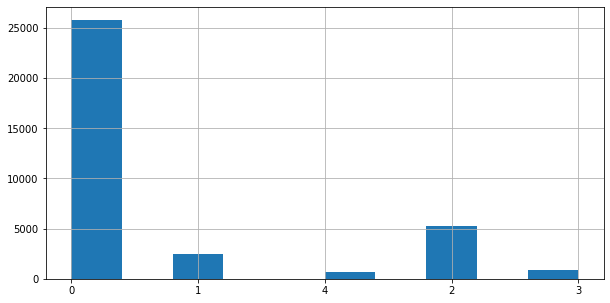

In [13]:
df['level'].hist(figsize = (10, 5))

In [15]:
def balance_data(class_size,df):
    train_df = df.groupby(['level']).apply(lambda x: x.sample(class_size, replace = True)).reset_index(drop = True)
    train_df = train_df.sample(frac=1).reset_index(drop=True)
    print('New Data Size:', train_df.shape[0], 'Old Size:', df.shape[0])
    train_df['level'].hist(figsize = (10, 5))
    return train_df

7022

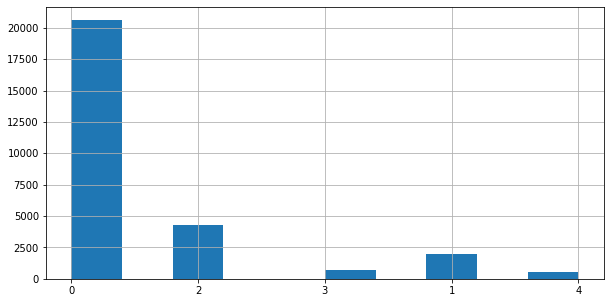

In [16]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df,test_size=0.2) # Here we will perform an 80%/20% split of the dataset, with stratification to keep similar distribution in validation set
train_df['level'].hist(figsize = (10, 5))
len(val_df)

New Data Size: 103120 Old Size: 28086


<AxesSubplot:>

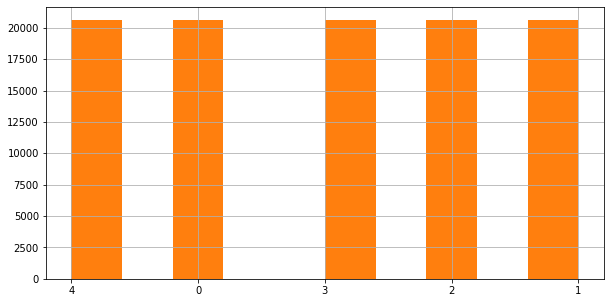

In [17]:
train_df = balance_data(train_df.pivot_table(index='level', aggfunc=len).max().max(),train_df) # I will oversample such that all classes have the same number of images as the maximum
train_df['level'].hist(figsize = (10, 5))

In [18]:
df = pd.concat([train_df,val_df]) #beginning of this dataframe is the oversampled training set, end is the validation set
len(df)

110142

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip = True,
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split = 0.2
)

In [21]:
x_train = train_datagen.flow_from_dataframe(
        train_df,
        directory=".",
        x_col="path",
        y_col="level",
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')
x_test = test_datagen.flow_from_dataframe(
        val_df,
        x_col="path",
        y_col="level",
        directory=".",
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')

Found 103120 validated image filenames belonging to 5 classes.
Found 7022 validated image filenames belonging to 5 classes.


In [22]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [24]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
t_x, t_y = next(x_train)

In [26]:
from keras.applications.inception_v3 import InceptionV3 as PTModel
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model
in_lay = Input(t_x.shape[1:])
base_pretrained_model = PTModel(input_shape =  t_x.shape[1:], include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
pt_depth = 2048
pt_features = base_pretrained_model(in_lay)
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

# here we do an attention mechanism to turn pixels in the GAP on an off

attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(Dropout(0.5)(bn_features))
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = Conv2D(8, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = Conv2D(1, 
                    kernel_size = (1,1), 
                    padding = 'valid', 
                    activation = 'sigmoid')(attn_layer)
# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.25)(gap)
dr_steps = Dropout(0.25)(Dense(128, activation = 'relu')(gap_dr))
out_layer = Dense(t_y.shape[-1], activation = 'softmax')(dr_steps)
model = Model(inputs = [in_lay], outputs = [out_layer])
from keras.metrics import top_k_categorical_accuracy
def top_2_accuracy(in_gt, in_pred):
    return top_k_categorical_accuracy(in_gt, in_pred, k=2)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                           metrics = ['categorical_accuracy', top_2_accuracy])
model.summary()

2022-11-05 13:21:34.990026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-05 13:21:34.991093: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-05 13:21:35.178136: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-05 13:21:35.179078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-05 13:21:35.179880: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

87924736/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
inception_v3 (Functional)       (None, 6, 6, 2048)   21802784    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 6, 6, 2048)   8192        inception_v3[0][0]               
__________________________________________________________________________________________________
dropout (Dropout)               (None, 6, 6, 2048)   0           batch_normalization_94[0][0]     
_____________________________

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
inception_v3 (Functional)       (None, 6, 6, 2048)   21802784    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 6, 6, 2048)   8192        inception_v3[0][0]               
__________________________________________________________________________________________________
dropout (Dropout)               (None, 6, 6, 2048)   0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

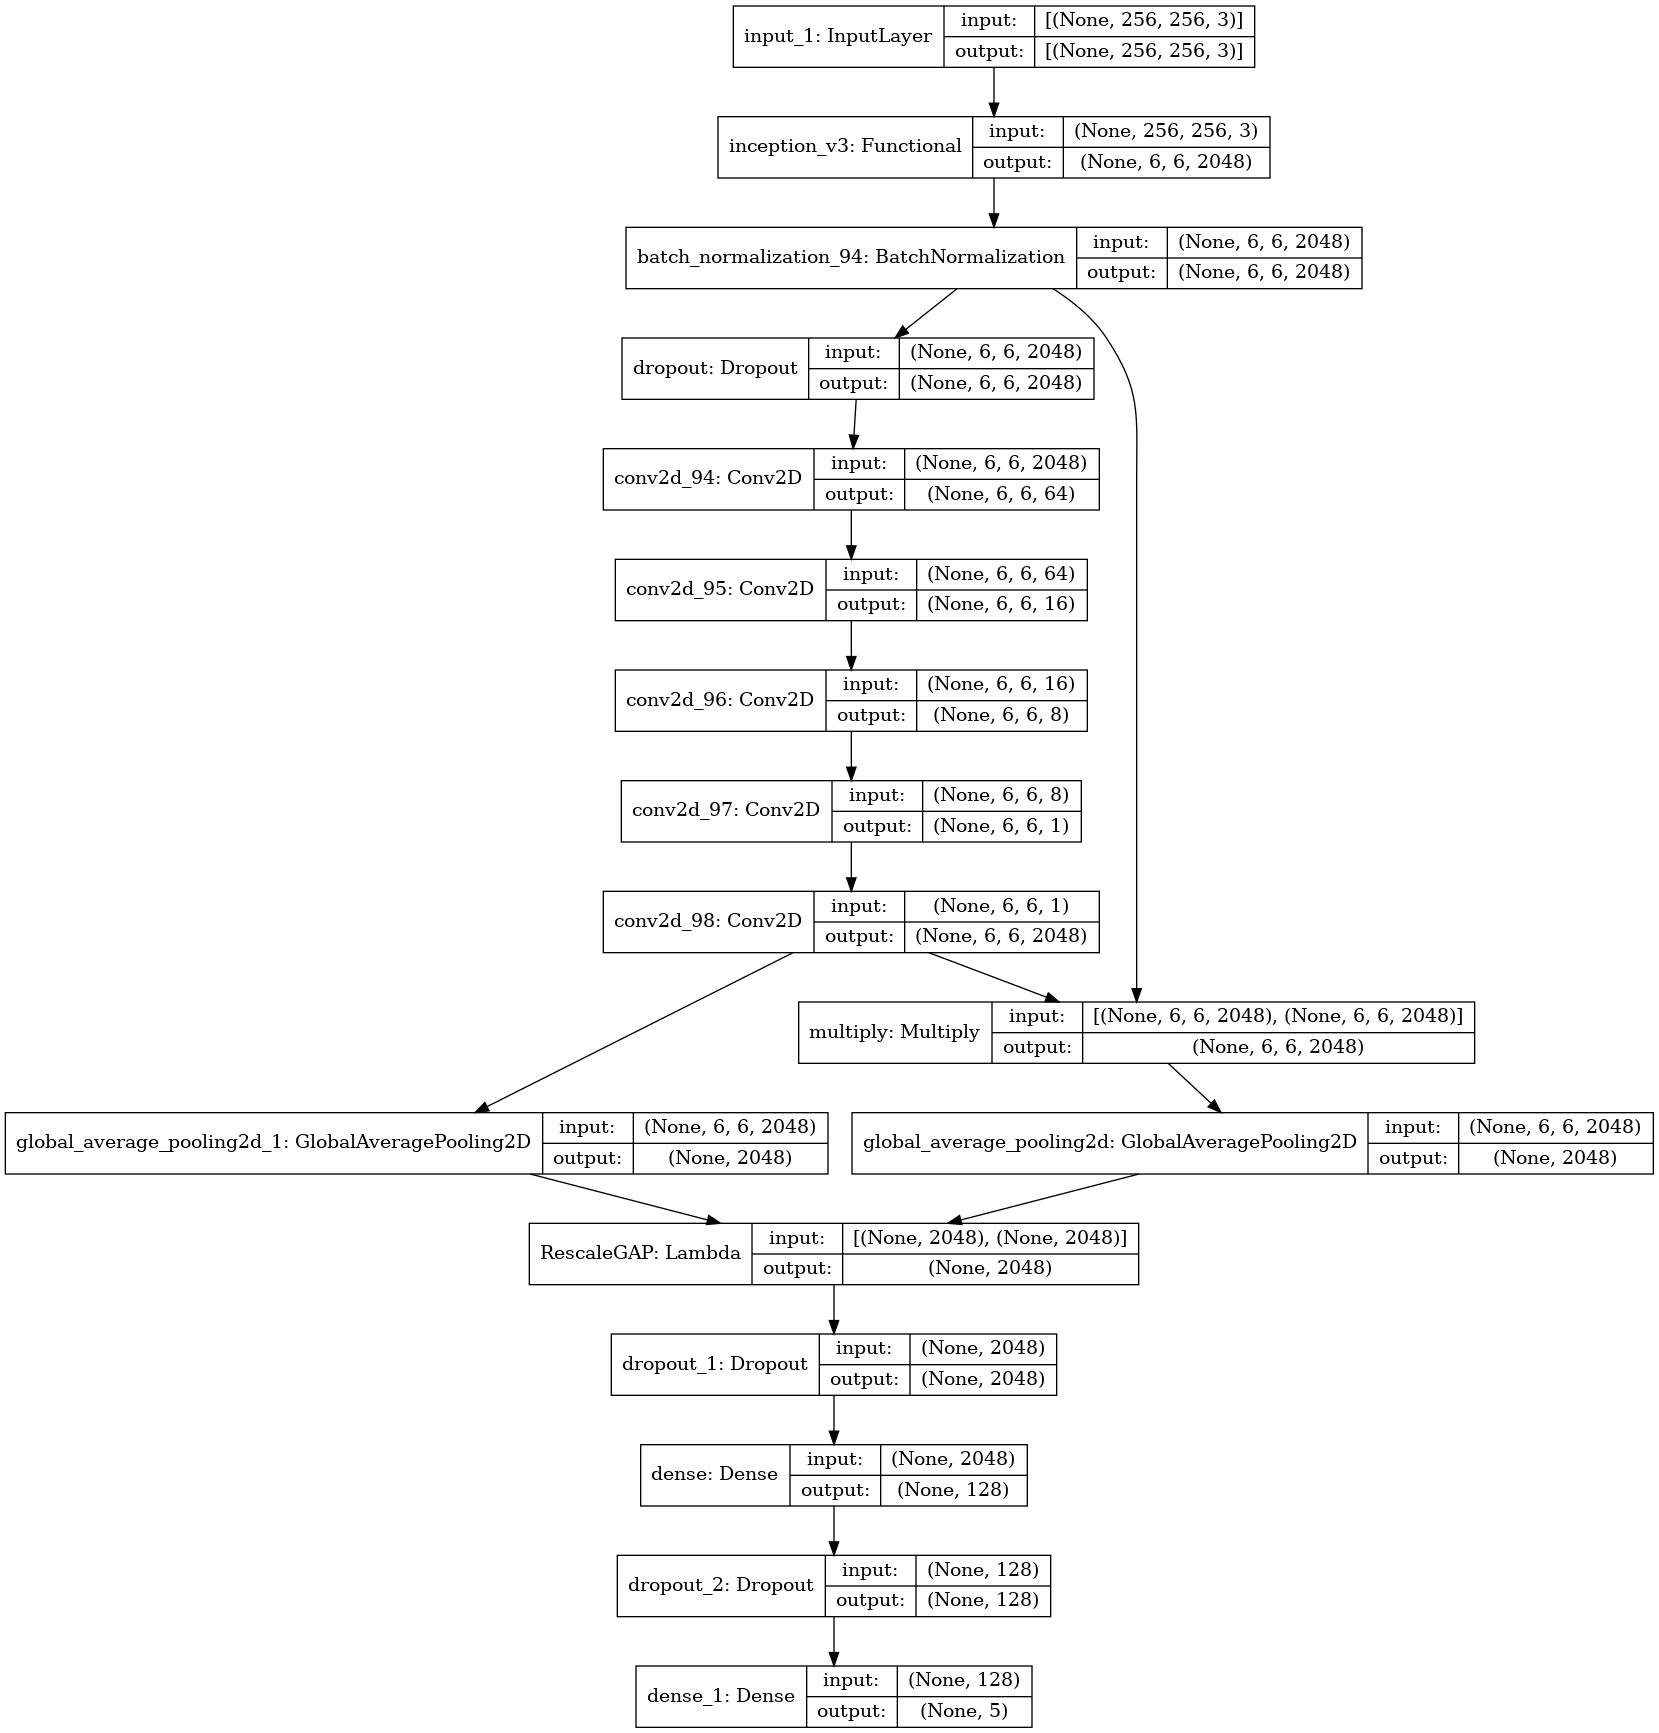

In [29]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

In [30]:
filepath = "dr-detector.hdf5"
checkpoint = ModelCheckpoint(filepath,
                             monitor="val_top2_accuracy",
                             verbose=1,
                             save_best_only=True,
                             mode="max")

earlystop = EarlyStopping(monitor='val_categorical_accuracy',
                          verbose=1, 
                          min_delta=0, 
                          patience=15, 
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              verbose=1,
                              factor=0.2, 
                              patience=6, 
                              min_delta=0.0001,
                              cooldown=0,
                              min_lr=0.001)


callbacks = [checkpoint, earlystop, reduce_lr]

In [31]:
history = model.fit(
        x_train,
        steps_per_epoch=x_train.samples // 64,
        epochs=10,
        validation_data=x_test,
        validation_steps=x_test.samples // 64,
        callbacks=callbacks)
model.save_weights("dr_messidor.h5")

2022-11-05 13:28:02.876953: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-11-05 13:28:11.226223: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1611/1611 [==============================] - 1661s 1s/step - loss: 1.3056 - categorical_accuracy: 0.4223 - top_2_accuracy: 0.6814 - val_loss: 1.1977 - val_categorical_accuracy: 0.4409 - val_top_2_accuracy: 0.7833
Epoch 2/10
1611/1611 [==============================] - 1523s 945ms/step - loss: 1.1959 - categorical_accuracy: 0.4729 - top_2_accuracy: 0.7245 - val_loss: 1.1719 - val_categorical_accuracy: 0.4527 - val_top_2_accuracy: 0.8007
Epoch 3/10
1611/1611 [==============================] - 1508s 936ms/step - loss: 1.1300 - categorical_accuracy: 0.5022 - top_2_accuracy: 0.7489 - val_loss: 1.2495 - val_categorical_accuracy: 0.4022 - val_top_2_accuracy: 0.7709
Epoch 4/10
1611/1611 [==============================] - 1528s 949ms/step - loss: 1.0786 - categorical_accuracy: 0.5277 - top_2_accuracy: 0.7681 - val_loss: 1.2406 - val_categorical_accuracy: 0.3839 - val_top_2_accuracy: 0.7732
Epoch 5/10
1611/1611 [==============================] - 1491s 925ms/step - loss: 1.0437 - categorical_accu

In [32]:
train_score = model.evaluate(x_train)
test_score = model.evaluate(x_test)

220/220 [==============================] - 115s 522ms/step - loss: 1.1787 - categorical_accuracy: 0.4475 - top_2_accuracy: 0.8129


In [33]:
print("Final training categorical accuracy = {:.2f} , Final validation categorical accuracy = {:.2f}".format(train_score[1]*100, test_score[1]*100))
print("Final training Top 2 accuracy = {:.2f} , Final validation Top 2 accuracy = {:.2f}".format(train_score[2]*100, test_score[2]*100))
print("Final training loss = {:.2f} , Final validation loss = {:.2f}".format(train_score[0], test_score[0]))

Final training categorical accuracy = 66.54 , Final validation categorical accuracy = 44.75
Final training Top 2 accuracy = 86.81 , Final validation Top 2 accuracy = 81.29
Final training loss = 0.76 , Final validation loss = 1.18


In [34]:
history.history

{'loss': [1.305558204650879,
  1.1959470510482788,
  1.1299645900726318,
  1.0785744190216064,
  1.043657898902893,
  1.0205788612365723,
  0.9862814545631409,
  0.9711152911186218,
  0.9535920023918152,
  0.9345971941947937],
 'categorical_accuracy': [0.42230674624443054,
  0.472873330116272,
  0.502172589302063,
  0.5276505947113037,
  0.5433483123779297,
  0.550547182559967,
  0.5667494535446167,
  0.5714840292930603,
  0.5788962841033936,
  0.58495032787323],
 'top_2_accuracy': [0.681368350982666,
  0.724464476108551,
  0.7489331364631653,
  0.7681232690811157,
  0.7791252732276917,
  0.7844419479370117,
  0.7980440855026245,
  0.8007994294166565,
  0.8054369688034058,
  0.810908854007721],
 'val_loss': [1.1977097988128662,
  1.1719480752944946,
  1.2494581937789917,
  1.2406389713287354,
  1.2376463413238525,
  1.1907628774642944,
  1.1437458992004395,
  1.2340683937072754,
  1.2231805324554443,
  1.1773892641067505],
 'val_categorical_accuracy': [0.44094038009643555,
  0.45269495

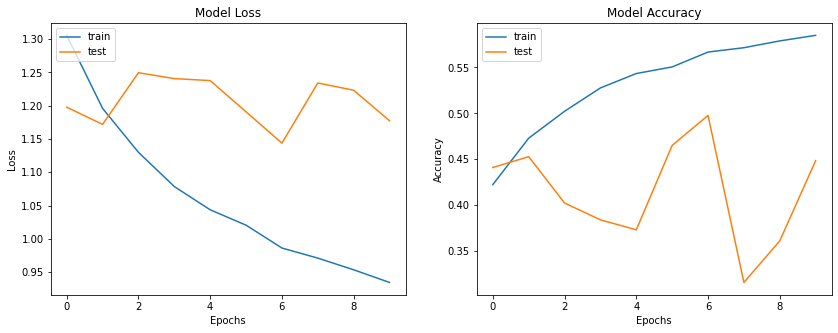

In [35]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

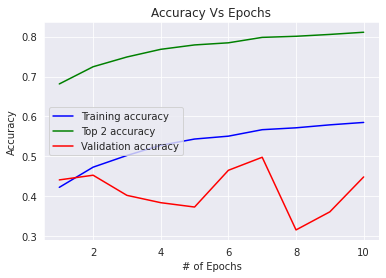

<Figure size 432x288 with 0 Axes>

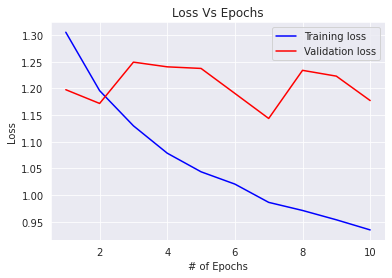

In [36]:
import seaborn as sb

sb.set_style("darkgrid")

Categorical_Acuracy = history.history['categorical_accuracy']
Top_2_Accuracy = history.history['top_2_accuracy']
Val_Categorical_Accuracy = history.history['val_categorical_accuracy']

Loss = history.history['loss']
Val_Loss = history.history['val_loss']

Epochs = range(1, len(Categorical_Acuracy) + 1)

#Train and validation accuracy
plt.plot(Epochs, Categorical_Acuracy, 'b', label='Training accuracy')
plt.plot(Epochs, Top_2_Accuracy, 'g', label='Top 2 accuracy')
plt.plot(Epochs, Val_Categorical_Accuracy, 'r', label='Validation accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Epochs')
plt.legend()

plt.figure()

plt.show()



print("\n\n")



#Train and validation loss



plt.plot(Epochs, Loss, 'b', label='Training loss')

plt.plot(Epochs, Val_Loss, 'r', label='Validation loss')

plt.xlabel('# of Epochs')

plt.ylabel('Loss')

plt.title('Loss Vs Epochs')

plt.legend()



plt.show()

Confusion Matrix
[[4544 4461 3003 4250 4366]
 [4488 4452 2954 4373 4357]
 [4429 4473 3015 4369 4338]
 [4523 4535 3001 4339 4226]
 [4440 4494 2947 4339 4404]]
Classification Report
              precision    recall  f1-score   support

           0       0.20      0.22      0.21     20624
           1       0.20      0.22      0.21     20624
           2       0.20      0.15      0.17     20624
           3       0.20      0.21      0.21     20624
           4       0.20      0.21      0.21     20624

    accuracy                           0.20    103120
   macro avg       0.20      0.20      0.20    103120
weighted avg       0.20      0.20      0.20    103120



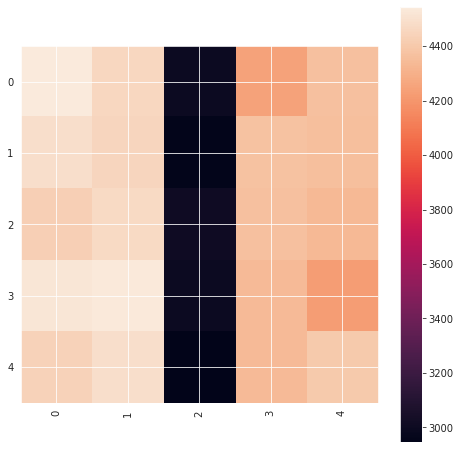

In [114]:
y_pred = model.predict(x_train)
y_pred = np.argmax(y_pred, axis=1)
class_labels = x_test.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(x_train.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(x_train.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

In [40]:
model.save("My_InceptionV3.h5")

In [95]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as pl
print(tf.__version__)


2.6.4


In [93]:
imagepath = '../input/diabetic-retinopathy-resized/resized_train_cropped/resized_train_cropped/10003_left.jpeg'

In [102]:
img = image.load_img(imagepath, target_size=(256, 256,3))

In [103]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [104]:
img_preprocessed = preprocess_input(img_batch)

In [113]:
prediction = model.predict(img_preprocessed)
prediction

array([[1.0000000e+00, 3.6347334e-21, 7.2770035e-21, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [85]:
import cv2

image = cv2.imread(imagepath)
np.shape(image)

(1024, 1024, 3)

In [86]:
t_x.shape[1:]

(256, 256, 3)

In [79]:
image.resize(256, 256, 3)

In [80]:
np.shape(image)

(256, 256, 3)

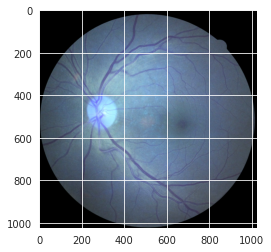

In [87]:
plt.imshow(image)